In [1]:
import random

In [2]:
a = random.randint(0,9)

if 0 <= a < 5:
    xxx = 'ばーか、ばーか'
else:
    xxx = 'バーカ、バーカ'

for i in range(a):
    print(xxx)

バーカ、バーカ
バーカ、バーカ
バーカ、バーカ
バーカ、バーカ
バーカ、バーカ
バーカ、バーカ
バーカ、バーカ
バーカ、バーカ


In [3]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

In [4]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [5]:
d = hdu.data
h = hdu.header

In [6]:
cube = sc.read(hdu)

In [7]:
#速度範囲の切り出し
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [8]:
subcube

SpectralCube with shape=(31, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:     31  type_s: VELO      unit_s: km / s  range:      -55.000 km / s:     -40.000 km / s

In [9]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

In [10]:
hdu_mom0 = mom0.hdu

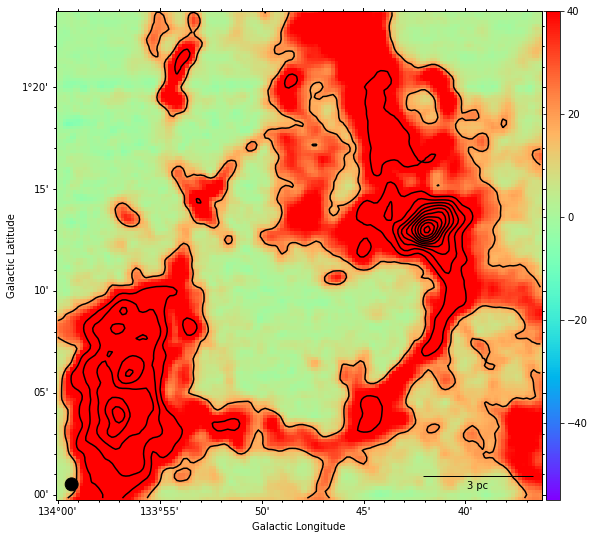

In [11]:
f = aplpy.FITSFigure(hdu_mom0)
f.show_colorscale(vmax=40, vmin=-55, cmap='rainbow')
# 軸の表記を変換
#f.set_xaxis_coord_type('scalar')
#f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバーarcsec
f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')